# Производная

In [208]:
from sympy import Symbol, limit, oo, sin, sqrt, solve, factorial, symbols, cos, exp, asin, idiff, diff, solve, log, atan
from sympy import *
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

In [267]:
def tangent(y, x0):
    y0 = y.subs(x, x0)
    x1 = x0 + 1
    k = diff(y,x).subs(x,x0)
    y1 = y0 + k
    return Line((x0,y0), (x1,y1))

## Пример 1

In [6]:
x = symbols('x')
у = x*cos(x)
diff(x*cos(x), x)

-x*sin(x) + cos(x)

## Пример 2

In [9]:
diff(log(x), х, 3)

2/x**3

## Пример 3

In [11]:
y = log(x**3,10)**3
diff(y,x,2).subs(x,10)

-9*(-6 + log(1000))*log(1000)/(100*log(10)**3)

In [12]:
diff(y,x,2).subs(х,10).simplify()

81*(2 - log(10))/(100*log(10)**2)

## Пример 4

In [15]:
у = (х**2+х-6)/(х**2-10*х+25)
z = diff(y,x)
z

9*log(x**3)**2/(x*log(10)**3)

In [16]:
solve(z, х)

[1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]

## Пример 5

In [21]:
x = symbols('x')
y = symbols('y')
f = x**2 + y**2 - 4
idiff(f, y, x)

-x/y

In [23]:
f = x**2 + y**2 - 4
idiff(f, y, x, 2)

(-x**2/y - y)/y**2

In [25]:
idiff(f, y, x, 2).simplify()

-(x**2 + y**2)/y**3

## Пример 6

In [29]:
t = symbols('t')
x = t - sin(t)
y = 1 - cos(t)
y_diff = diff(y,t)/diff(x,t)
y_diff

sin(t)/(1 - cos(t))

In [30]:
y_2diff = diff(y_diff,t)/diff(x,t)
y_2diff.simplify()

-1/(cos(t) - 1)**2

## Пример 7

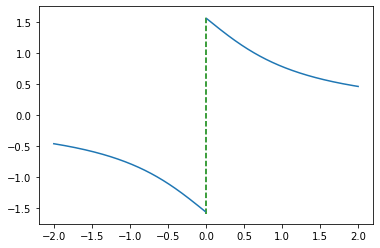

In [33]:
x = np.linspace(-2,2,500)
x[(x>-0.01) & (x < 0.01)] = np.nan
y = np.arctan(1/x)
plt.plot(x,y)
plt.vlines(0, -1.6, 1.6, color='g', linestyles='dashed')
plt.show()

In [37]:
x = symbols('x')
y = atan(1/x)
z = diff(y,x)
limit(z, x, 0, dir='+')

-1

In [38]:
limit(z, x, 0, dir='-')

-1

## Пример 8

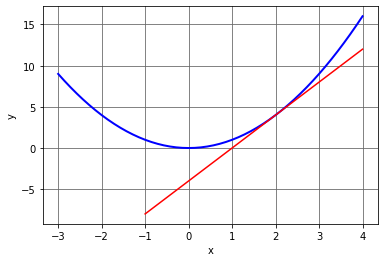

In [55]:
x = np.linspace(-3,4,50)
y1 = x**2
plt.plot(x,y1,lw=2,c='b')
x = np.linspace(-1,4,50)
y2 = 4*x - 4
plt.plot(x,y2,c='r')
plt.xlabel('х')
plt.ylabel('у')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

## Пример 9 

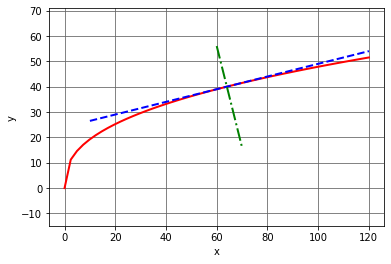

In [65]:
x = np.linspace(0,120,50)
y1 = 6*x**(1/3) + 2*x**(1/2)
plt.plot(x,y1,lw=2,c='r')
x = np.linspace(10,120,50)
y2 = x/4 + 24
plt.plot(x,y2,'--',lw=2,c='b')
x = np.linspace(60,70,50)
y3 = 296 - 4*x
plt.plot(x,y3,'-.',lw=2,c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='-', color='0.4')
plt.axis('equal')
plt.show()

## Пример 10

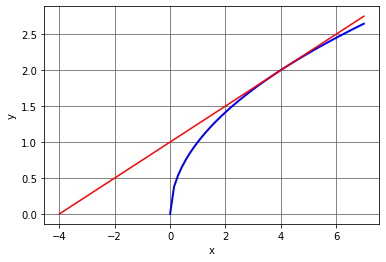

In [72]:
x = np.linspace(0,7,50)
y1 = np.sqrt(x)
plt.plot(x,y1,lw=2,c='b')
x = np.linspace(-4,7,50)
y2 = x/4 + 1
plt.plot(x,y2,c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid (True, linestyle='-', color='0.4')
plt.show()

## Исследование функции

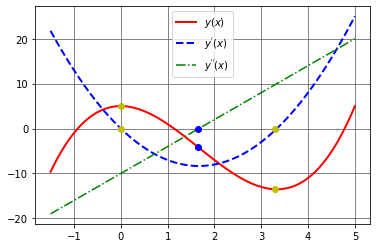

In [76]:
t = np.linspace(-1.5, 5, 100)
f = t**3 - 5*t**2 + 5
fd = 3*t**2 - 10*t
fdd = 6*t - 10
plt.plot(t,f,lw=2,color='red',label = "$y(x)$")
plt.plot(t,fd,'--',lw=2,color='b',label = "$y^{'}(x)$")
plt.plot(t,fdd, '-.', color='g',label = "$y^{''}(x)$")
plt.plot([0], [0], 'o', color='y')
plt.plot([0], [5], 'o', color='y')
plt.plot([3.3], [0], 'o', color='y')
plt.plot([3.3], [-13.4], 'o', color='y')
plt.plot([1.65], [0], 'o', color='b')
plt.plot([1.65], [-4], 'o', color='b')
plt.grid(True, linestyle='-', color='0.4')
plt.legend()
plt.show()

## Пример 11

In [80]:
x, y = symbols('x y')
solve(x**2 < 3)

(x < sqrt(3)) & (-sqrt(3) < x)

## Пример 12

In [81]:
solve(x**2 - y**2, x)

[-y, y]

## Пример 13

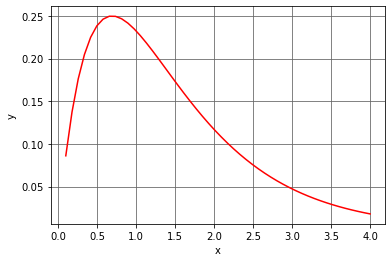

In [83]:
f = lambda х: np.exp(-x) - np.exp(-2*x)
x = np.linspace(0.1,4,50)
plt.plot(x, f(x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

In [91]:
f_max = lambda x: -(np.exp(-x) - np.exp(-2*x))
res = minimize(f_max, -2)
res
#print('x_max: %.3f f_max: %.3f' % (res.x, f(res.x)))

      fun: -0.24999999999945666
 hess_inv: array([[1.98553383]])
      jac: array([-7.26431608e-07])
  message: 'Optimization terminated successfully.'
     nfev: 26
      nit: 12
     njev: 13
   status: 0
  success: True
        x: array([0.69314571])

## Пример 14

In [95]:
x = symbols('x')
y = x**3
x0 = solve(diff(y,x))[0]
print('x0: %.3f y(x0): %.3f' % (x0, y.subs(x, x0)))

x0: 0.000 y(x0): 0.000


In [96]:
diff(y,x,2).subs(x,x0)

0

In [97]:
diff(у,х,3).subs(x,x0)

6

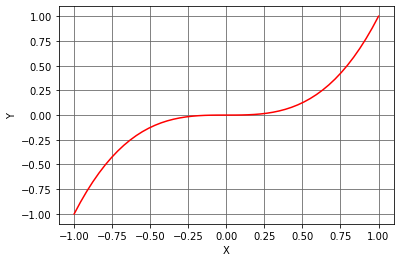

In [100]:
x = np.linspace(-1,1,50)
plt.plot(x, x**3, 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

## Пример 15

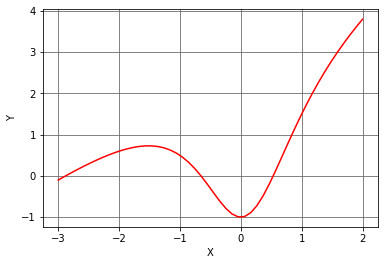

In [102]:
f = lambda x: (x**3+3*x**2-1) / (x**2+1)
x = np.linspace(-3,2,50)
plt.plot(x, f(x), 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

In [103]:
res = minimize(f, 1)
print('x_min: %.3f fmin: %.3f' % (res.x, f(res.x)))

x_min: 0.000 fmin: -1.000


In [105]:
f_max = lambda х: -(х**3+3*х**2-1) / (х**2+1)
res = minimize(f_max, -2)
print('x_max: %.3f f max: %.3f' % (res.x, f(res.x)))

x_max: -1.513 f max: 0.731


## Пример 16

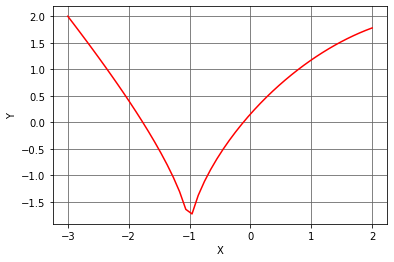

In [109]:
fun = lambda x: np.cbrt(2*(x+1)**2*(5-x)) - 2
х = np.linspace(-3, 3, 100)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, fun(x), 'r')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

In [111]:
res = minimize(fun, -1.5)
print('x_min: %.3f' % res.x)

x_min: -0.490


In [112]:
res = minimize(fun, -1.001)
print('xmin: %.3f' % res.x)

xmin: -1.001


In [113]:
print('у(-З): %.3f у(3): %.3f' % (fun(-3), fun(3)))

у(-З): 2.000 у(3): 2.000


## Пример 17

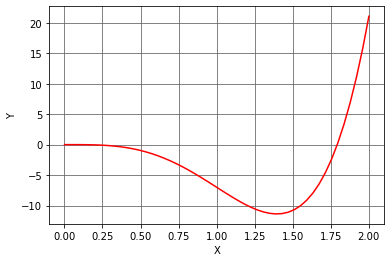

In [116]:
f = lambda х: х**4 * (12*np.log(x) - 7)
x = np.linspace(0.001,2,50)
plt.plot(x, f(x), 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

In [118]:
x = symbols('x')
y = x**4 * (12*log(x) - 7)
y_2deriv = diff(y,x,2)
y_2deriv

144*x**2*log(x)

In [120]:
x_inflex = solve(y_2deriv, х)
x_inflex

[0, 1]

In [121]:
diff(y,x,3).subs(x, 1)

144

In [123]:
print('слева: %.1f справа: %.1f' % \
(y_2deriv.subs(х,0.9), y_2deriv.subs(x,1.1)))

слева: -12.3 справа: 16.6


## Пример 18

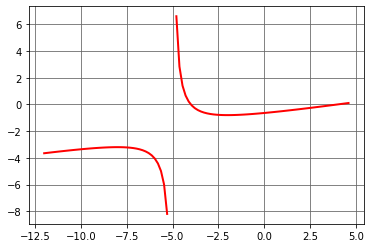

In [126]:
x = symbols('x')
y = (x**2-16)/(5*(x+5))
f = lambda x: (x**2-16)/(5*(x+5))
x = np.linspace(-12,4.6,100)
x[(x>-5.2) & (x < -4.8)] = np.nan
y = f(x)
plt.plot(x,y,lw=2,color='red')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

In [137]:
k = limit(y/x, x, oo)
k

[0.304761904761905, 0.306779839677906, 0.308883012171189, 0.311077290143904, 0.313369118850322, 0.315765596024034, 0.318274559292237, 0.320904688316465, 0.323665624672657, 0.326568113214044, 0.329624169597136, 0.332847279861164, 0.336252639526242, 0.339857441742124, 0.343681226754482, 0.347746308608928, 0.352078299940624, 0.356706762413725, 0.361666019632855, 0.366996182264575, 0.372744453361638, 0.378966808048556, 0.385730179808348, 0.393115341960985, 0.401220757835569, 0.41016780366134, 0.420107973297588, 0.431233004150565, 0.443789410003645, 0.458099838573065, 0.474595317725753, 0.493865478843057, 0.516739662957381, 0.544423617619494, 0.578742005732031, 0.62259649329254, 0.680901978831109, 0.762706013697976, 0.886701767911677, 1.09878205502658, 1.54988154777573, nan, nan, -1.37984702981539, -0.614479638009047, -0.316326530612243, -0.155522744324264, -0.0533453167814762, 0.0186105890279805, 0.0731271274076626, 0.116837254822004, 0.153557502196837, 0.185673186572737, 0.214788500473149

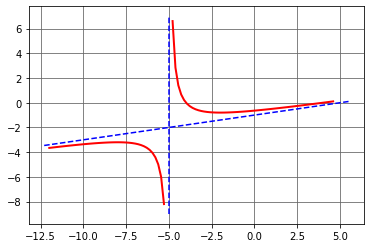

In [142]:
f = lambda х: (х**2-16)/(5*(х+5))
х = np.linspace(-12,4.6,100)
х[(х>-5.2) & (х < -4.8)] = np.nan
У = f(x)
plt.plot(x,y,lw=2,color='red')
х = np.linspace(-12.3,5.5,100)
у = х/5 - 1
plt.plot(х,у,'--',color='b')
plt.plot([-5,-5],[-9,7],'--',color='b')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

## Пример 19

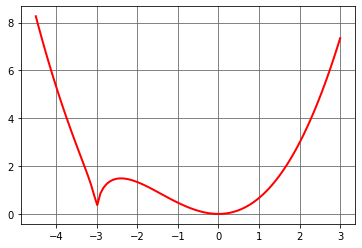

In [151]:
x = symbols('х')
y = x**2*sqrt(abs(x+3))/3
f = lambda x: x**2*np.sqrt(abs(x+3))/3
x = np.linspace(-4.5,3,100)
f_x = f(x)
plt.plot(x,f_x,lw=2,color='red')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

In [152]:
y.subs(x,0)

х**2*sqrt(Abs(х + 3))/3

In [154]:
limit(y, х, oo)

oo

In [156]:
k = limit(y/x, x, oo)
k

[-0.0740740740740741*х**2*sqrt(Abs(х + 3)), -0.0753424657534247*х**2*sqrt(Abs(х + 3)), -0.0766550522648084*х**2*sqrt(Abs(х + 3)), -0.0780141843971631*х**2*sqrt(Abs(х + 3)), -0.0794223826714801*х**2*sqrt(Abs(х + 3)), -0.0808823529411765*х**2*sqrt(Abs(х + 3)), -0.0823970037453184*х**2*sqrt(Abs(х + 3)), -0.0839694656488549*х**2*sqrt(Abs(х + 3)), -0.0856031128404669*х**2*sqrt(Abs(х + 3)), -0.0873015873015873*х**2*sqrt(Abs(х + 3)), -0.0890688259109312*х**2*sqrt(Abs(х + 3)), -0.0909090909090909*х**2*sqrt(Abs(х + 3)), -0.0928270042194093*х**2*sqrt(Abs(х + 3)), -0.0948275862068965*х**2*sqrt(Abs(х + 3)), -0.0969162995594714*х**2*sqrt(Abs(х + 3)), -0.0990990990990991*х**2*sqrt(Abs(х + 3)), -0.101382488479263*х**2*sqrt(Abs(х + 3)), -0.10377358490566*х**2*sqrt(Abs(х + 3)), -0.106280193236715*х**2*sqrt(Abs(х + 3)), -0.108910891089109*х**2*sqrt(Abs(х + 3)), -0.111675126903553*х**2*sqrt(Abs(х + 3)), -0.114583333333333*х**2*sqrt(Abs(х + 3)), -0.117647058823529*х**2*sqrt(Abs(х + 3)), -0.120879120879121

In [161]:
x = symbols('х')
y1 = x**2*sqrt(-x-3)/3
y1_ = diff(y1,x). simplify()
y1_

-х*(5*х + 12)/(6*sqrt(-х - 3))

In [172]:
y2 = x**2*sqrt(x+3)/3
y12_ = diff(y1,x,2).simplify()
y12_

sqrt(-х - 3)*(5*х**2 + 24*х + 24)/(4*(х**2 + 6*х + 9))

In [166]:
y22_ = diff(у2,х,2).simplify()
y22_

(5*х**2 + 24*х + 24)/(4*(х + 3)**(3/2))

In [173]:
xp1 = solve(y12_)
xp1

[-12/5 - 2*sqrt(6)/5, -12/5 + 2*sqrt(6)/5]

In [176]:
diff(y1, x, 3).subs(x,xp1[0]).evalf(5)

-10.465

In [179]:
diff(y1, x, 3).subs(x,xp1[1]).evalf(4)

1.234*I

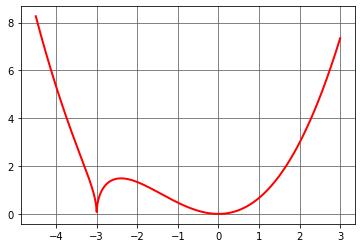

In [181]:
f = lambda х: x**2*np.sqrt(abs(x+3))/3
x = np.linspace(-4.5,3,2000)
f_x = f(x)
plt.plot(x,f_x,lw=2,color='red')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

## Пример 20

In [182]:
x, y = symbols("x y")
z = x*y**2 + exp(-x)

In [184]:
diff(z, x, 2)

exp(-x)

In [185]:
diff(z, y, 2)

2*x

## Пример 21

In [186]:
x, y = symbols('х у')
z = sin(x)*cos(y)
diff(z, x, 2, y)

sin(у)*sin(х)

## Пример 22

In [187]:
x,y = symbols('x y')
z = 5*log(x**2 + y**2)
z_x = diff(z,x).subs({x:1, y:2})
z_y = diff(z,y).subs({x:1, y:2})
grad_f = (z_x, z_y)
grad_f

(2, 4)

## Пример 23

In [191]:
x,y = symbols('х у')
z = х**2 + х*у +7
z_x = diff(z,x).subs({x:1, y:-1})
z_y = diff(z,y).subs({x:1, y:-1})
grad_f = (z_x, z_y)
grad_f

(1, 1)

## Пример 24

In [192]:
l = Point(3,4)
l_n = l.distance(Point(0,0))
cos_a = l.x/l_n
cos_b = l.y/l_n
x,y = symbols('х у')
z = x**2 + y**2
z_x = diff(z,x).subs({x:1, y:1})
z_y = diff(z,y).subs({x:1, y:1})
z_l = z_x*cos_a + z_y*cos_b
z_l

14/5

## Пример 25

In [197]:
def tangent_plane(F,M):
    F_diff_x = diff(F,x).subs({x:M.x,y:M.y,z:M.z})
    F_diff_y = diff(F,y).subs({x:M.x,y:M.y,z:M.z})
    F_diff_z = diff(F,z).subs({x:M.x,y:M.y,z:M.z})

    n = Point(F_diff_x, F_diff_y, F_diff_z)

    р = Plane(M, normal_vector=n).equation()

    К = Point(M.x+n.x, M.y+n.y, M.z+n.z)
    l_n = Line(M, К).arbitrary_point()
    return р, In

In [202]:
x, y, z = symbols('x у z')
F = x**2 + y**2 + z**2 - 9
M = Point(1,1,1)
p, l_n = tangent_plane(F,M)

In [203]:
p

2*x + 2*y + 2*z - 6

## Пример 26

In [205]:
z = lambda w: (w[0]-1)**2 + (w[1]-3)**4
res = minimize(z, (0, 0))
res.x

array([0.99999999, 2.98725136])

In [206]:
z((1,3)) < z((0.999,3.001))

True

In [207]:
z((1,3))

0

## Пример 27

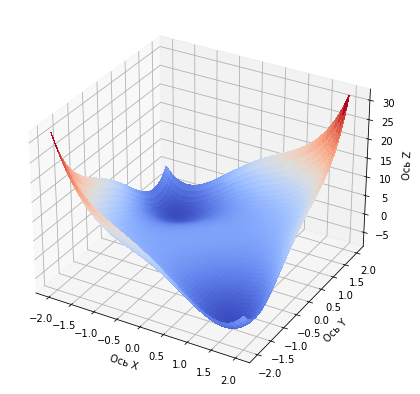

In [211]:
z = lambda w: w[0]**4 + w[1]**4 - 2*w[0]**2 +4*w[0]*w[1] - 2*w[1]**2

fig = plt.figure(figsize=(7,7))
axes = fig.gca(projection='3d')
y = x = np.linspace(-2, 2, 50)
x, y = np.meshgrid(x, y)
Z = z((x,y))
surf = axes.plot_surface(x, y, Z, cmap='coolwarm',linewidth=0, antialiased=False)

axes.set_xlabel('Ось X')
axes.set_ylabel('Ось Y')
axes.set_zlabel('Ось Z')
plt.show()

In [212]:
res = minimize(z, (1, -1))
res.x

array([ 1.41421356, -1.41421356])

In [213]:
z(res.x)

-8.0

In [214]:
res = minimize(z, (-1, 1))
res.x

array([-1.41421356,  1.41421356])

In [216]:
z(res.x)

-8.0

## Пример 28

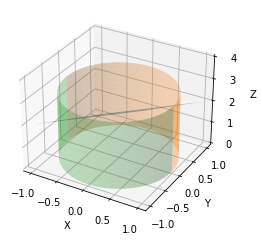

In [219]:
f = lambda w: w[0] - w[1] + 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
                     
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)

x, y = np.meshgrid(x, y)
z1 = f((x,y))
ax.plot_surface(x, y, z1, alpha=0.4)

x = np.linspace(-1, 1, 100)
z = np.linspace(0, 3, 100)
xc, zc = np.meshgrid(x, z)
yc = np.sqrt(1-xc**2)
ax.plot_surface(xc, yc, zc, alpha=0.3)
ax.plot_surface(xc, -yc, zc, alpha=0.3)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [221]:
cons = ({'type': 'eq', 'fun': lambda w: w[0]**2 + w[1]**2 - 1})

bnds = ((None, None), (None, None))

res = minimize(f, (-0.5, 0.5), bounds=bnds, constraints=cons)

res.x

array([-0.70710679,  0.70710677])

In [222]:
f_max = lambda w: -(1.5*w[0] - w[1] + 1)
cons = ({'type': 'eq', 'fun': lambda w: w[0]**2 + w[1]**2 - 1})
bnds = ((None, None), (None, None))
res = minimize(f_max, (0.5, -0.5), bounds=bnds,constraints=cons)

res.x

array([ 0.83205051, -0.55469991])

## Пример 29

In [229]:
x,y = symbols('x y')
z = 4.5*x**(0.33) * y**(0.66)
z_x = diff(z, x)
z_y = diff(z, y)

E_x = (x/z)*z_x
E_y = (y/z)*z_y
print('E_x: %.2f E_y: %.2f' % (E_x, E_y))

E_x: 0.33 E_y: 0.66


## Пример 30

In [230]:
K,V0 = symbols('K V0')
V = V0*log(5+K**2)

Vprim2 = diff(V,K,2)

Vprim3 = diff(V,K,3)

s = solve(Vprim2,K)
s

[-sqrt(5), sqrt(5)]

In [233]:
Vprim3.subs(K,s[1])

-sqrt(5)*V0/25

## Примеры решения задач

Вычислить $y'$ для функции $xcos(lnx)+sin(lnx))$

In [237]:
x = symbols('х')
y = x*(cos(log(x))+sin(log(x)))
diff(y,x)

х*(-sin(log(х))/х + cos(log(х))/х) + sin(log(х)) + cos(log(х))

In [238]:
diff(y,x).simplify()

2*cos(log(х))

Решить уравнение $y'(x) = 0$, где $y(x) = max\{x^2-2x+3; 2x^2-5x-1\}$

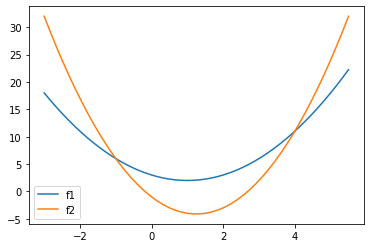

In [248]:
f1 = lambda х: х**2-2*х+3
f2 = lambda х: 2*х**2-5*х-1
x = np.linspace(-3, 5.5, 50)
y1 = f1(x)
plt.plot(x,y1, label = "f1")
y2 = f2(x)
plt.plot(x,y2, label = "f2")
plt.legend()
plt.show()

In [243]:
f1(-1) == f2(-1)

True

In [244]:
f1(4) == f2(4)

True

In [251]:
x = symbols('x')
f1 = x**2-2*x+3
f2 = 2*x**2-5*x-1

y_diff1 = diff(f2,x)
y_diff1

4*x - 5

In [252]:
y_diff2 = diff(f1,x)
y_diff2

2*x - 2

Показать, что функция $y = xsinx$ удовлетворяет уравнению $\frac{y'}{cosx} - x = tgx$

In [254]:
x, y = symbols('х у')
y = x*sin(x)
yprim = diff(y, x)
f = yprim/cos(x) - x
f.simplify()

tan(х)

Написать уравнения касательных к графику функции $y=(x^2+1)(x-2)$ в точках её пересечения с осями координат.

In [268]:
x = symbols('x', real=True)
y = (x**2 + 1)*(x - 2)

In [269]:
tangent(y, 0).equation()

-x + y + 2

In [270]:
хр = solve(y, х)
tangent(y, хр[0]).equation()

-5*x + y + 10

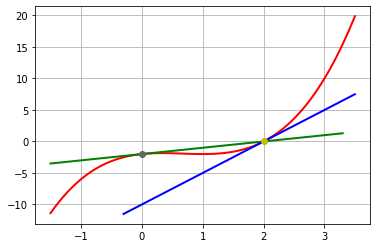

In [274]:
x = np.linspace(-1.5,3.5,100)
y = (x**2 + 1)*(x - 2)
plt.plot(x, y, lw=2, color='red')
x = np.linspace(-1.5,3.3,100)
y1 = x - 2
plt.plot(x, y1, lw=2, color='green')

x = np.linspace(-0.3,3.5,100)
y2 = 5*x - 10
plt.plot(x, y2, lw=2, color='blue')
plt.plot([0], [-2], 'o', color='0.4')
plt.plot([2], [0], 'o', color='y')
plt.grid(True)
plt.show()

При каком значении параметра $a$ парабола $y = ax^2$ касается кривой $y = lnx$?

In [277]:
x, a, x0 = symbols('x а х0')

y1 = a*x**2
y2 = log(x)

y1_diff = diff(y1,x).subs(x,x0)
y2_diff = diff(y2,x).subs(x,x0)

y1_0 = y1.subs(x,x0)
y2_0 = y2.subs(x,x0)

solve([y1_0-y2_0, y1_diff-y2_diff], [x0, a])

[(exp(1/2), exp(-1)/2)]

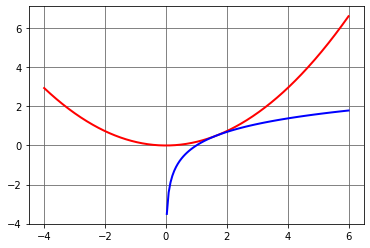

In [280]:
x = np.linspace(-4, 6, 500)
y = x**2/(2*np.exp(1))
plt.plot(x, y, lw=2, c='r')
x = np.linspace(0.03, 6, 100)
y = np.log(x)
plt.plot(x, y, lw=2, c='b')
plt.grid(True, linestyle='-', color='0.4')
plt.show()

Исследовать на экстремум функцию $y = \sqrt[3]{x} \times lnx$.

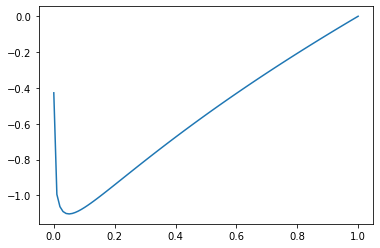

In [281]:
f = lambda x: (x**(1/3))*np.log(x)

x = np.linspace(0.0001,1,100)
y = f(x)
plt.plot(x, y)
plt.show()

In [282]:
res = minimize(f, 0.01)
print('xmin: %.4f y(x_min): %.3f' % (res.x, f(res.x)))

xmin: 0.0498 y(x_min): -1.104


In [284]:
x = symbols('x')
y = x**(1/3) * log(x)
x_min = solve(diff(y,x))[0]
print('x_min: %.4f y(x_min) %.3f' % (x_min, y.subs(x, x_min)))

x_min: 0.0498 y(x_min) -1.104


Найти производную функции $w = \frac{x^2}{2} + \frac{y^2}{9} - z^2$ в точке $A(1;2)$ по направлению радиус-вектора этой точки.

In [285]:
l = Point(2,3,1)

l_n = l.distance(Point(0,0,0))

cos_a = l.x/l_n
cos_b = l.y/l_n
cos_c = l.z/l_n

In [288]:
x,y,z = symbols('x у z')
w = x**2/2 + y**2/9 - z**2

w_x = diff(w,x).subs({x:2, y:3, z:1})
w_y = diff(w,y).subs({x:2, y:3, z:1})
w_z = diff(w,z).subs({x:2, y:3, z:1})

In [289]:
w_x = diff(w,x).subs([(x,2),(y,3),(z,1)])
w_y = diff(w,y).subs([(x,2),(y,3),(z,1)])
w_z = diff(w,z).subs([(x,2),(y,3),(z,1)])

w_l = w_x*cos_a + w_y*cos_b + w_z*cos_c
w_l

2*sqrt(14)/7

Найти экстремумы функции $z = x^2 -4xy - 2y^2 + 8x$

In [303]:
def critical_points(z):

    z_x = diff(z,x)
    z_y = diff(z,y)

    cr_point = solve([z_x, z_y], [x, y], dict=True)

    A = diff(z,x,2)
    B = diff(z,x,y)
    C = diff(z,y,2)

    D = A*C - B**2
    return cr_point, A, D

In [305]:
def suff_indic(A, D, cr_point):
    A0 = A.subs(cr_point)
    D0 = D.subs(cr_point)
    return D0, A0

In [304]:
x, y = symbols('х у')
z = x**2 - 4*x*y - 2*y**2 + 8*x
cr_point, A, D = critical_points(z)
cr_point

[{х: -4/3, у: 4/3}]

In [306]:
D0, A0 = suff_indic(A, D, cr_point[0])
D0, A0

(-24, 2)

Зависимость между себестоимостью продукции $C$ и объёмом её производства $Q$ выражается формулой $C(Q) = 80 - 0,38Q$. Определить эластичность себестоимости при выпуске продукции $Q = 20$ ден. ед.

In [308]:
Q = symbols('Q')
c = 80 - 0.38*Q
Dprim = diff(c,Q)
E = (Q*Dprim/c).subs(Q,20)
S(E).n(3)

-0.105

Функция спроса $D$ и предложения $S$ от цены $p$ имеют вид: $D(p) = 40 - 1,3p$, $S(p) = 20 + 1,2p$. Найти эластичность спроса в точке равновенсой цены.

In [312]:
p = symbols('р')
D = 40 - 1.3*р
S = 20 + 1.2*р
p0 = solve(D-S,p)
p0[0].n(2)

8.0

In [314]:
Dprim = diff(D,p)
E = (p*Dprim/D).subs(p,p0[0])
E.n(3)

-0.351

## Решение собственной задачи с использованием производных

Модель Блэка-Шоулза. Уравнения Блэка-Шоулза произвели революцию в ценообразовании опционов, когда в 1973 году Мрайон Шоулз и Фишер Блэк опубликовали свою работу.

При рассмотрении приведенных ниже формул необходимо учитывать ряд важных допущений:

1. Процентная ставка известна и постоянна во времени. 
2. Акции следуют случайному блужданию в непрерывном времени, дисперсия путей цены акции следует логнормальному распределению. 
3. Волатильность постоянна 
4. Акции не выплачивают дивиденды (однако их можно модифицировать для включения дивидендов).
5. Опцион может быть исполнен только по истечении срока действия, т.е. это европейский тип опциона.
6. Отсутствие транзакционных издержек, т.е. комиссий за продажу в короткую позицию и т.д. 
7. Возможна дробная торговля, т.е. мы можем купить/продать 0,x любой акции.

Формулы Блэка-Шоулза для акций, не выплачивающих дивиденды

$Call = S_{0}N(d_1) - N(d_2)Ke^{-rT}$

$Put=N(-d_2)Ke^{-rT} - N(-d_1)S_0$

$\\d_1 = \frac{ln(\frac{S}{K}) + (r + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}} \\ \\d_2 =d_1 - \sigma\sqrt{T}$

S : текущая цена актива

K: цена исполнения опциона

r: безрисковая ставка 

T : время до истечения срока опциона 

σ: годовая волатильность доходности актива

N(x): кумулятивная функция распределения для стандартного нормального распределения, показанного ниже.

$N(x) =\displaystyle \int_{-\infty}^{x} \frac{e^{-x^{2}/2}} {\sqrt{2\pi}}$

In [357]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [358]:
import numpy as np
from scipy.stats import norm
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [348]:
N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

В этом разделе мы рассмотрим влияние изменения входных параметров на стоимость контрактов и опционов.

Влияние S на стоимость опциона.
Здесь мы будем поддерживать постоянными все переменные, кроме текущей цены акций S, и рассмотрим, как меняется стоимость контрактов и опционов.

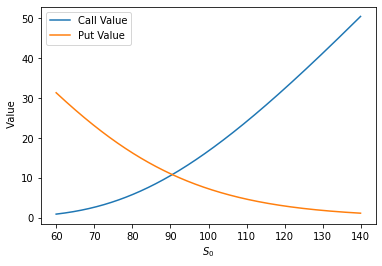

In [350]:
K = 100
r = 0.1
T = 1
sigma = 0.3

S = np.arange(60,140,0.1)

calls = [BS_CALL(s, K, T, r, sigma) for s in S]
puts = [BS_PUT(s, K, T, r, sigma) for s in S]
plt.plot(S, calls, label='Call Value')
plt.plot(S, puts, label='Put Value')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend()

 Влияние $σ$ на стоимость по Блэку-Шоулзу
 
Как и следовало ожидать, при постоянстве других переменных и увеличении параметра волатильности стоимость контрактов и опционов увеличивается линейно, как показано ниже.

Чтобы понять, почему стоимость контрактов строго больше стоимости опционов в зависимости от волатильности, изменим процентную ставку $r$ до 0 и заметим, что кривые точно совпадают. Вместо того чтобы строить графики влияния на процентные ставки, мы можем сделать вывод, что увеличение процентных ставок увеличивает стоимость контрактов и уменьшает стоимость опционов.

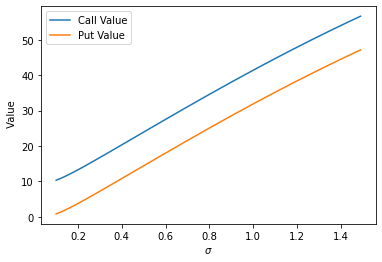

In [351]:
K = 100
r = 0.1
T = 1
Sigmas = np.arange(0.1, 1.5, 0.01)
S = 100

calls = [BS_CALL(S, K, T, r, sig) for sig in Sigmas]
puts = [BS_PUT(S, K, T, r, sig) for sig in Sigmas]
plt.plot(Sigmas, calls, label='Call Value')
plt.plot(Sigmas, puts, label='Put Value')
plt.xlabel('$\sigma$')
plt.ylabel(' Value')
plt.legend()

Влияние времени на цену по Блэку-Шоулзу
 
С увеличением времени увеличивается неопределенность относительно будущей цены. Поскольку неопределенность идет на пользу 
держателю опциона, цена опциона растет со временем. Снова попробуем установить процентную ставку на ноль, чтобы увидеть, 
что разница между опционами и контрактами исчезает.

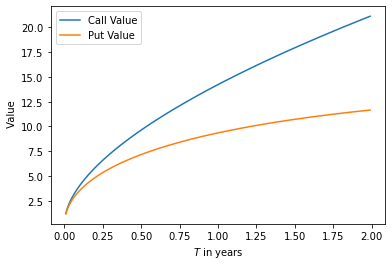

In [355]:
K = 100
r = 0.05
T = np.arange(0, 2, 0.01)
sigma = 0.3
S = 100

calls = [BS_CALL(S, K, t, r, sigma) for t in T]
puts = [BS_PUT(S, K, t, r, sigma) for t in T]
plt.plot(T, calls, label='Call Value')
plt.plot(T, puts, label='Put Value')
plt.xlabel('$T$ in years')
plt.ylabel(' Value')
plt.legend()

Основная проблема подхода Блэка Шоулза заключается в том, что она не может адекватно работать при условии изменчивой волатильности.